# Размер выборки n = 200

# Пороговые значения для k = 0.0001, для b = 0.001

# Шаг $\varepsilon$ = 0.05, от 2.0 до 3.0

In [1]:
import numpy as np
from src.sensitivity import getsensitivity
from src.people_dataset import PeopleDataset

In [2]:
# Создание объекта класса PeopleDataset
# по умолчанию размер выборки 20, далее естественно выборки будут и других размеров
dataset = PeopleDataset(200)

# Генерация данных
dataset.generate_data()
#dataset.print_data()
#dataset.print_regression_line()
print("coefs are = ", dataset.get_coefficients())

coefs are =  (0.43580123289251155, 6.639959596851128)


In [3]:
k_sens, b_sens = getsensitivity(dataset.X, dataset.y)

Max delta k: 0.02
Max delta b: 3.49
True k: 0.44
True b: 6.64


In [4]:
# будет определено также отдельным файлом, не в блокноте, пока для удобства
def laplace_mech(dataset, epsilon, k_sens, b_sens):
    k_true, b_true = dataset.get_coefficients()
    k_noise = np.random.laplace(loc = 0, scale = k_sens / epsilon, size = 1)
    b_noise = np.random.laplace(loc = 0, scale = b_sens / epsilon, size = 1)
    return k_true + k_noise, b_true + b_noise

In [5]:
# Истинные коэффициенты
dataset.get_coefficients()

(0.43580123289251155, 6.639959596851128)

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def compare_steps(dataset, k_sens, b_sens, epsilon_start, epsilon_end, epsilon_step, k_threshold, b_threshold):
    epsilon_values = np.arange(epsilon_start, epsilon_end, epsilon_step)
    k_true, b_true = dataset.get_coefficients()
    results = []

    for epsilon in epsilon_values:
        print("epsilon = ", epsilon)
        k_mean = 0
        b_mean = 0
        k_diff = float('inf')
        b_diff = float('inf')
        step_count = 0
        k_means = []
        b_means = []

        while k_diff > k_threshold or b_diff > b_threshold:
            k_tild, b_tild = laplace_mech(dataset, epsilon, k_sens, b_sens)

            k_mean = (k_mean * step_count + k_tild) / (step_count + 1)
            b_mean = (b_mean * step_count + b_tild) / (step_count + 1)

            k_diff = np.abs(k_mean - k_true)
            b_diff = np.abs(b_mean - b_true)

            step_count += 1
            k_means.append(k_mean)
            b_means.append(b_mean)

            if step_count >= 50000: # если за 10к шагов не получили, что хотели, то выходим\
                print("Атака не удалась")
                break

        results.append((epsilon, step_count, k_means, b_means))

    return results



epsilon =  2.0
epsilon =  2.05
epsilon =  2.0999999999999996
epsilon =  2.1499999999999995
epsilon =  2.1999999999999993
Атака не удалась
epsilon =  2.249999999999999
epsilon =  2.299999999999999
epsilon =  2.3499999999999988
epsilon =  2.3999999999999986
epsilon =  2.4499999999999984
epsilon =  2.4999999999999982
epsilon =  2.549999999999998
Атака не удалась
epsilon =  2.599999999999998
epsilon =  2.6499999999999977
epsilon =  2.6999999999999975
epsilon =  2.7499999999999973
epsilon =  2.799999999999997
Атака не удалась
epsilon =  2.849999999999997
Атака не удалась
epsilon =  2.899999999999997
epsilon =  2.9499999999999966
epsilon =  2.9999999999999964


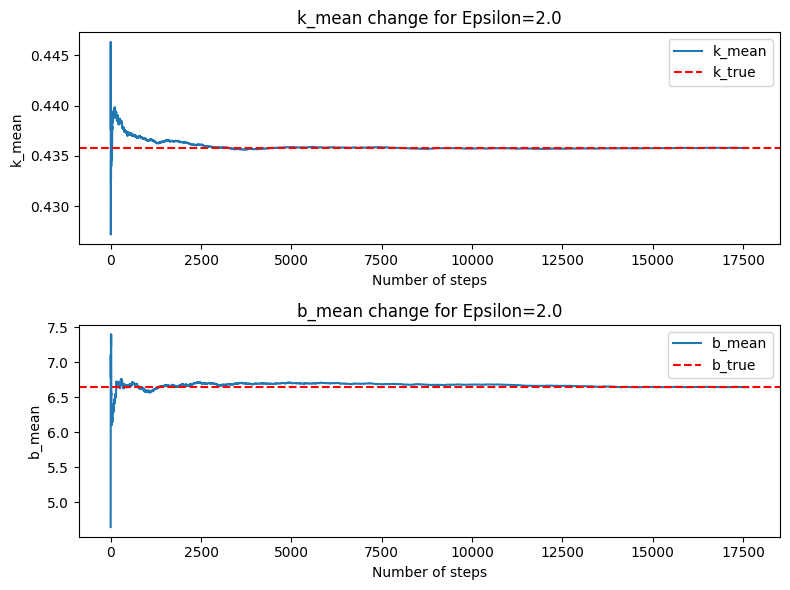

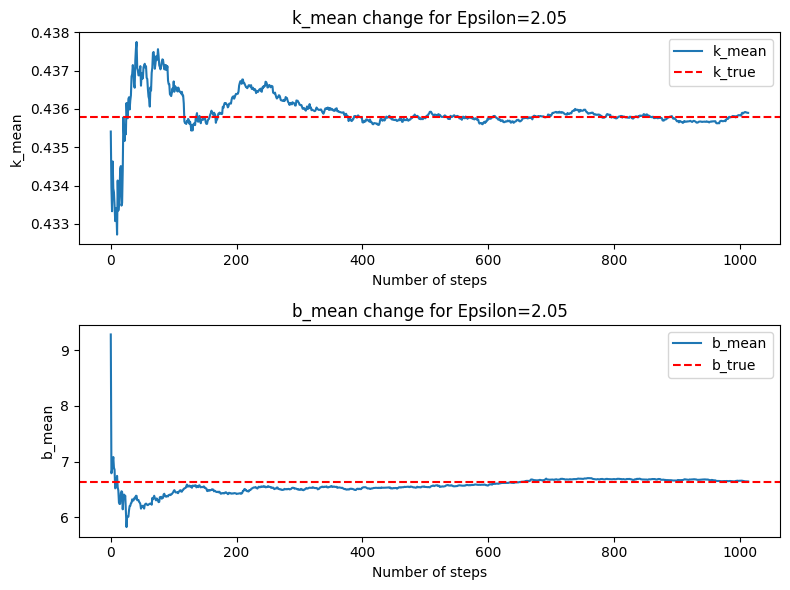

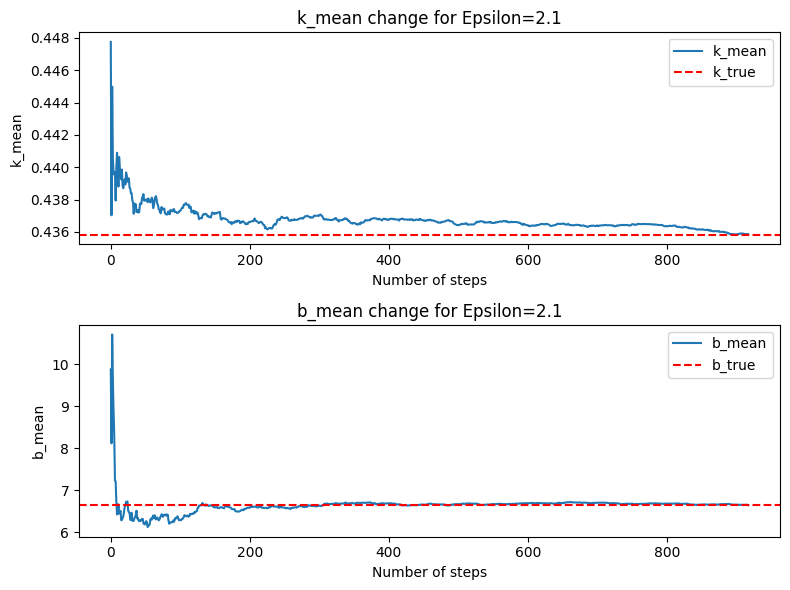

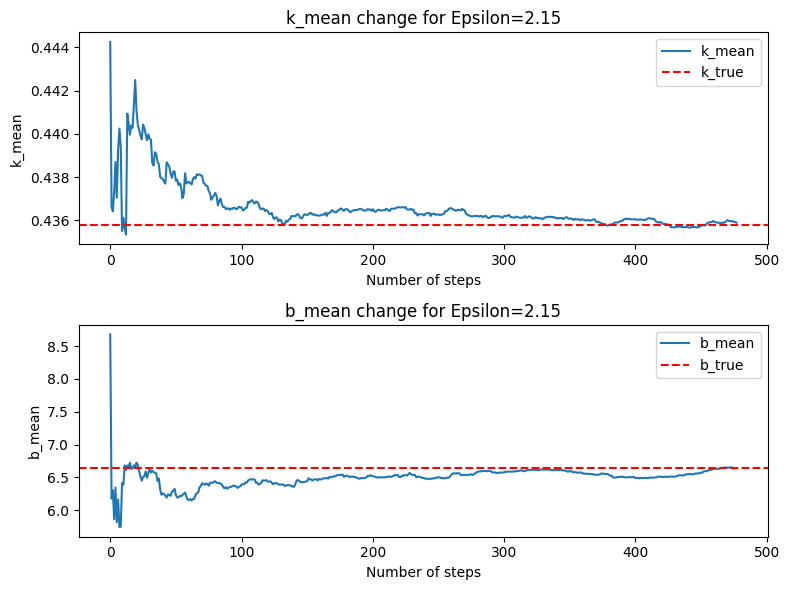

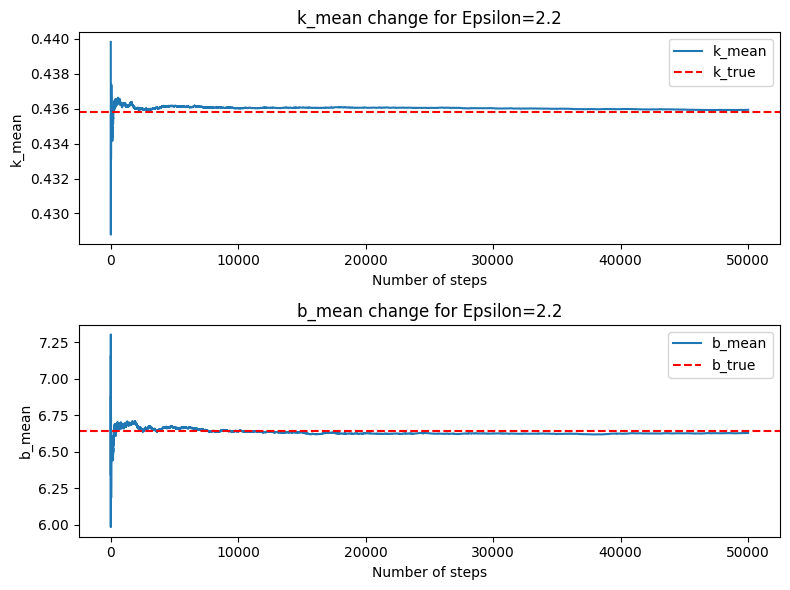

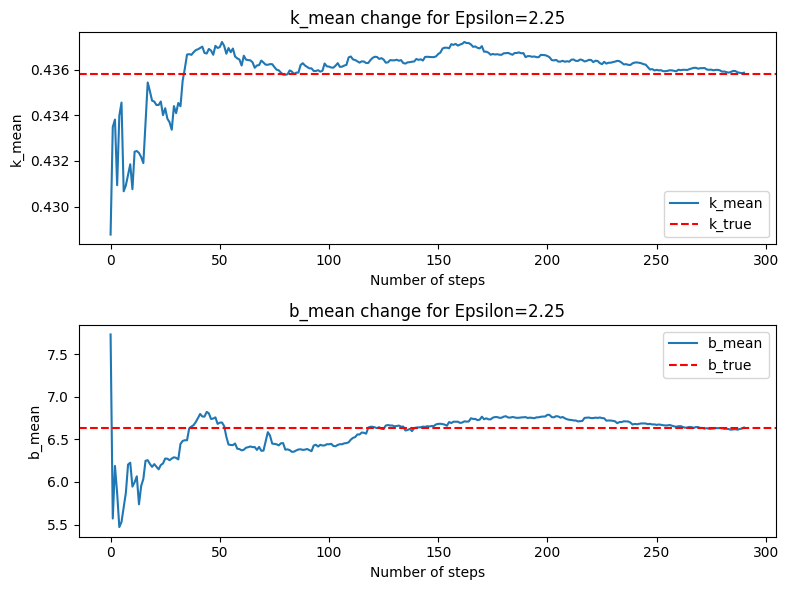

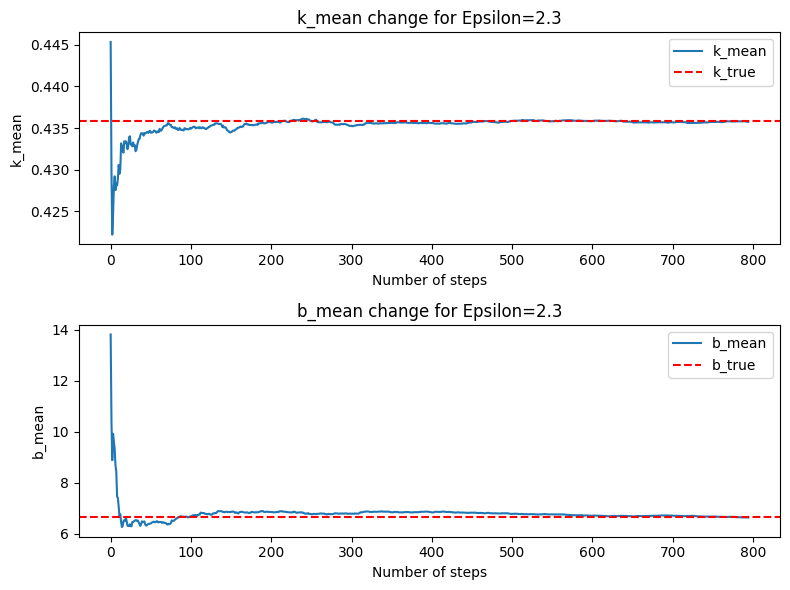

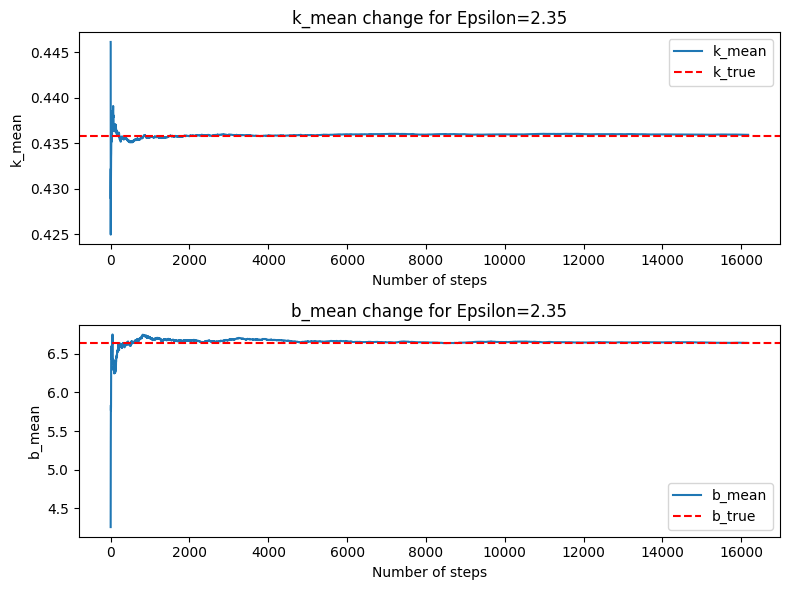

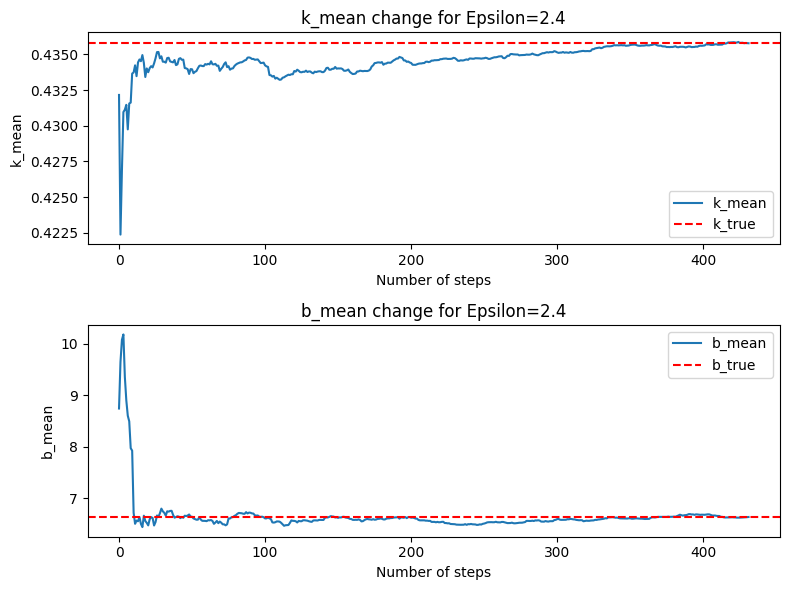

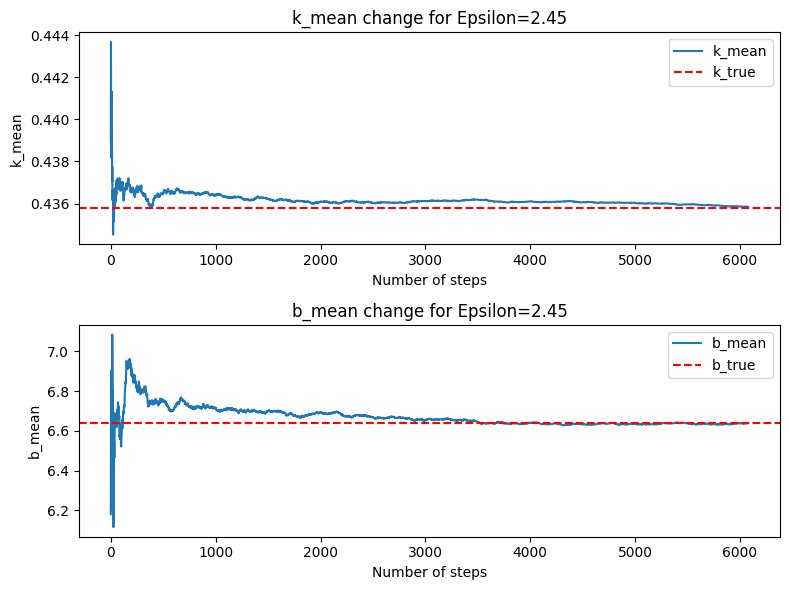

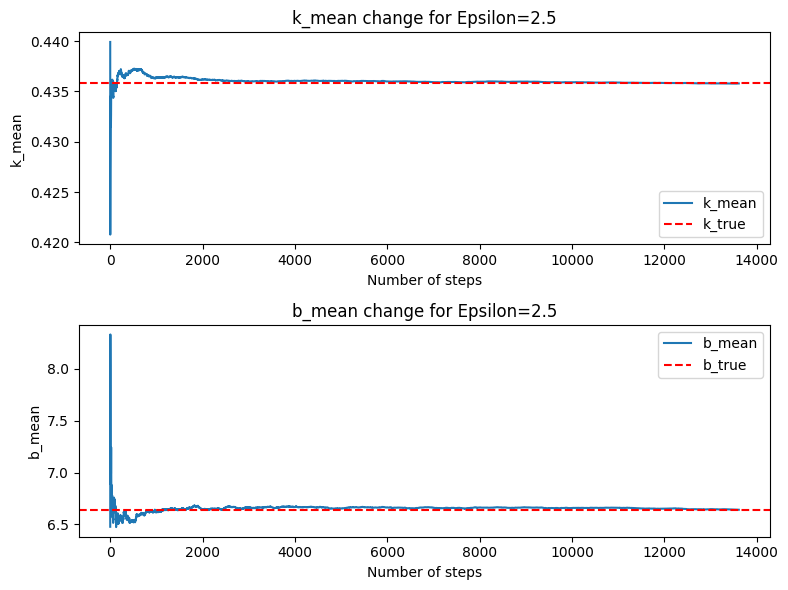

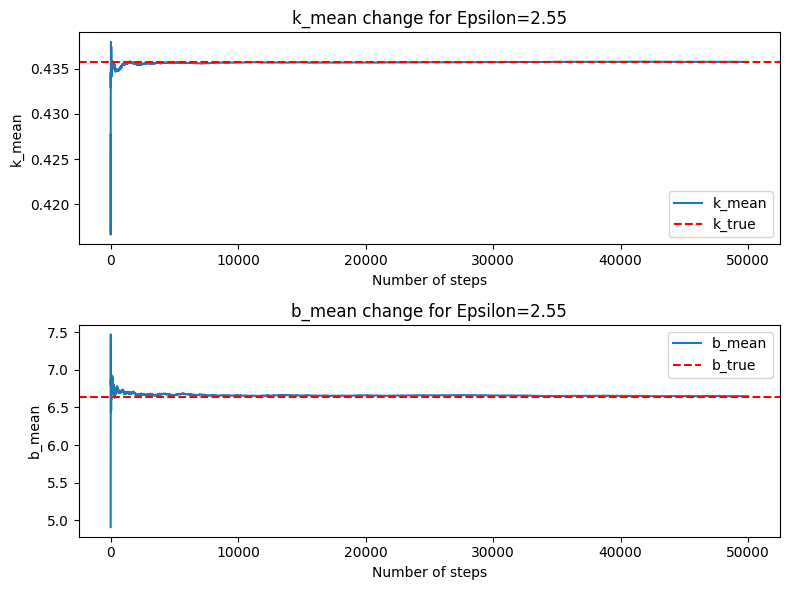

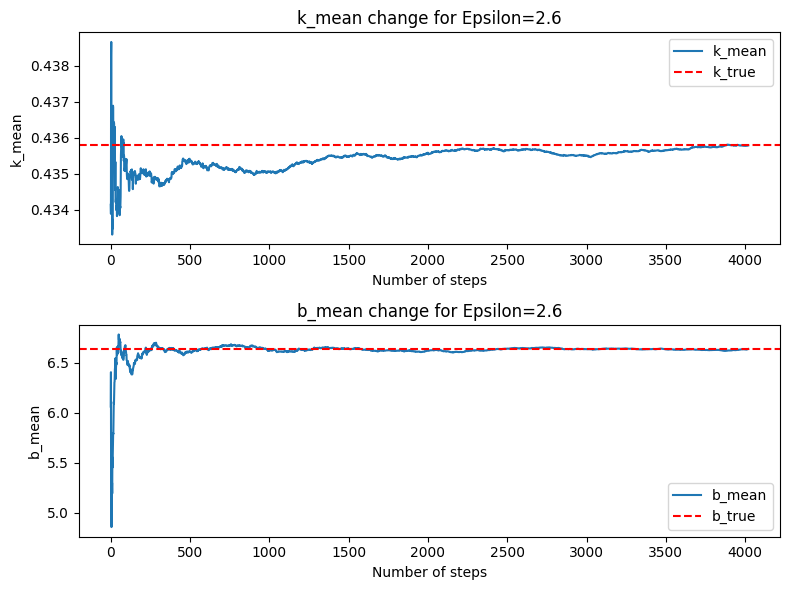

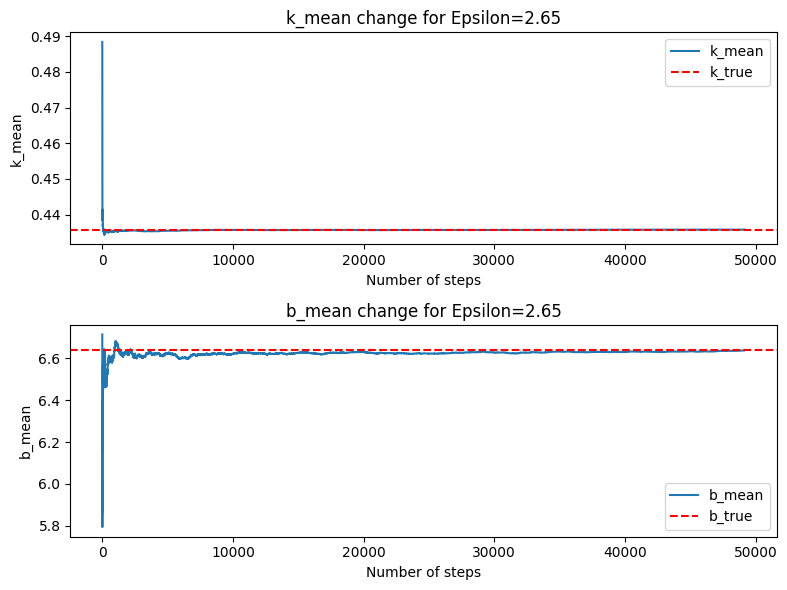

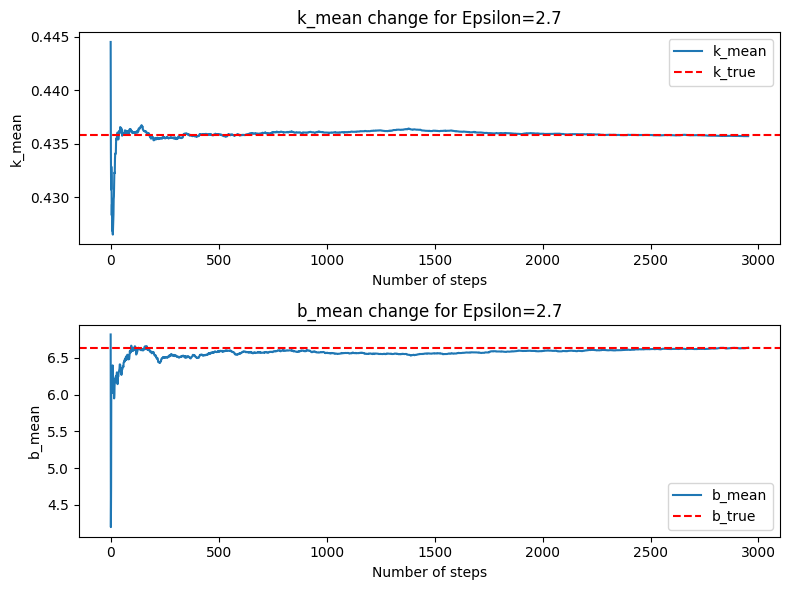

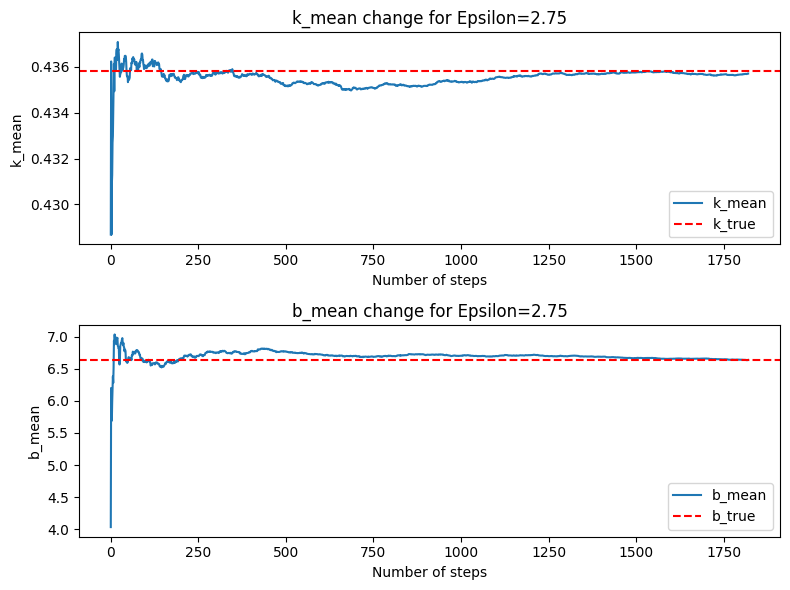

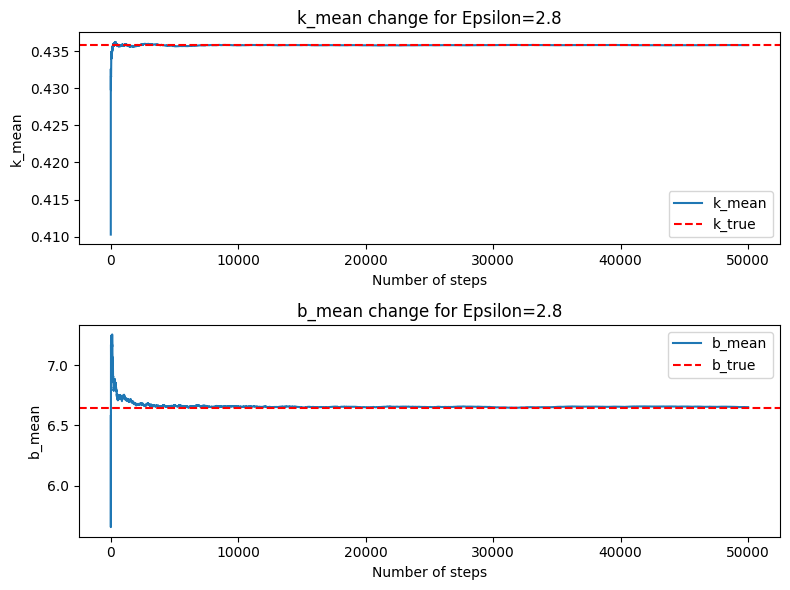

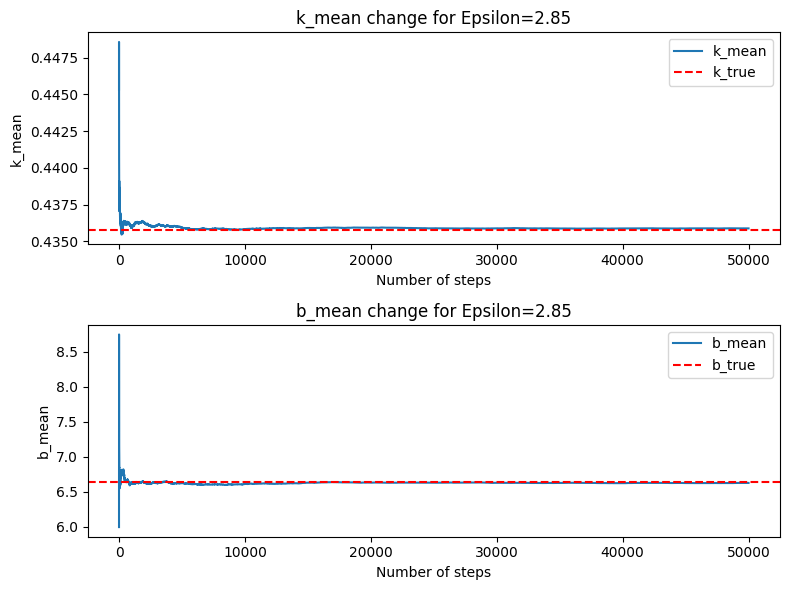

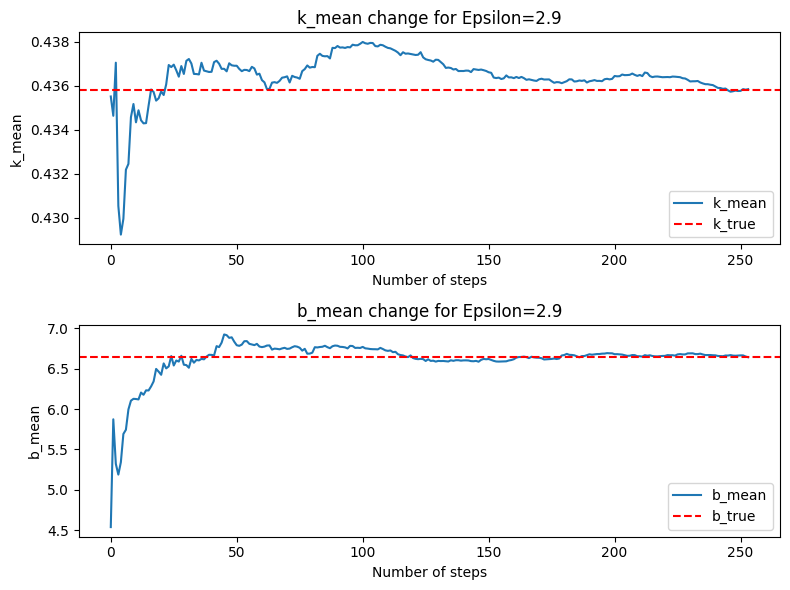

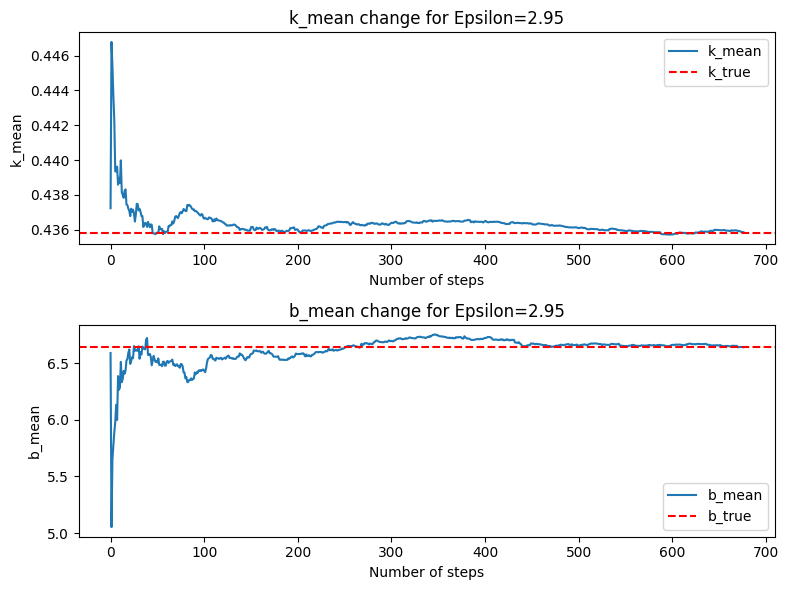

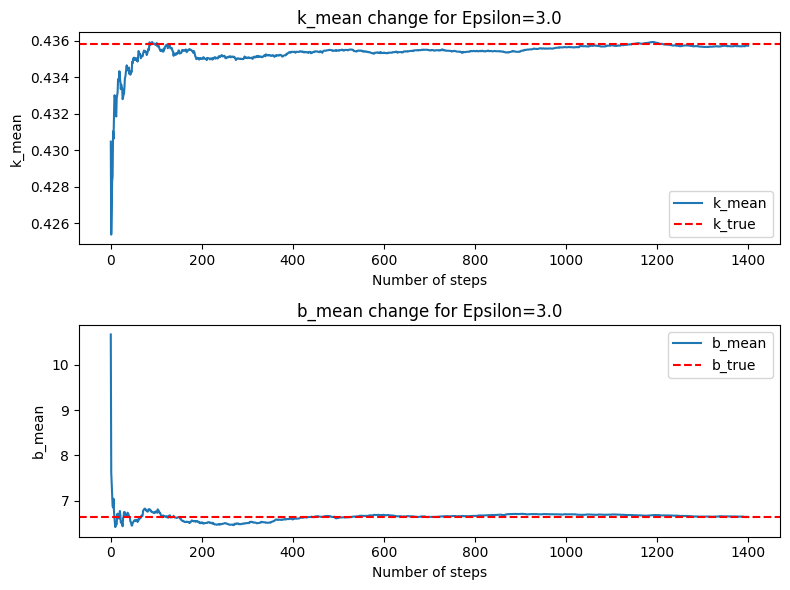

In [7]:
# Использование:
epsilon_start = 2.0
epsilon_end = 3.01
epsilon_step = 0.05
k_threshold = 0.0001
b_threshold = 0.001

results = compare_steps(dataset, k_sens, b_sens, epsilon_start, epsilon_end, epsilon_step, k_threshold, b_threshold)

k_true, b_true = dataset.get_coefficients()

for epsilon, step_count, k_means, b_means in results:
    plt.figure(figsize=(8, 6))
    plt.subplot(2, 1, 1)
    plt.plot(range(step_count), k_means, label='k_mean')
    plt.axhline(y=k_true, color='r', linestyle='--', label='k_true')
    plt.xlabel('Number of steps')
    plt.ylabel('k_mean')
    plt.title(f'k_mean change for Epsilon={round(epsilon, 2)}')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(range(step_count), b_means, label='b_mean')
    plt.axhline(y=b_true, color='r', linestyle='--', label='b_true')
    plt.xlabel('Number of steps')
    plt.ylabel('b_mean')
    plt.title(f'b_mean change for Epsilon={round(epsilon, 2)}')
    plt.legend()

    plt.tight_layout()
    plt.show()